## Logistic Regression 
Also called _Logit regression_ is used for classification problems but can be used for regression problems as well (and vise versa). It computes _probability_ that a certain instance belongs to class 0 or 1, if the probability is >50% it belongs to positive class (class 1) otherwise negative class (class 0)

Estimated probability is given by:   
$$
\hat{p} = h_\theta(x) = \sigma(x^T \theta)
$$

where $\sigma()$ is the logistic function which is a type of sigmoid function (i.e S-shaped) which returns a value ranging from 0-1

$$
\sigma(t) = \frac{1}{1+ e^{-t}}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


Text(0.5, 1.0, 'Logit function')

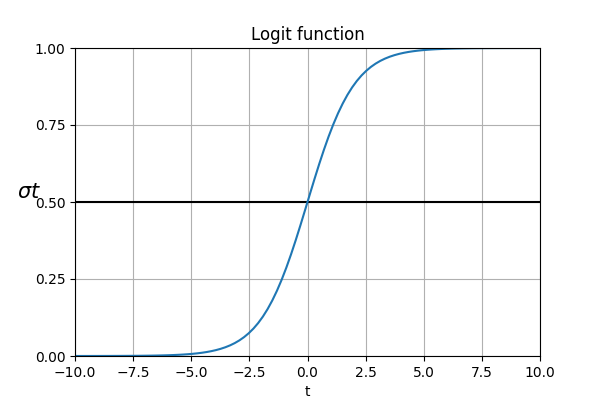

In [8]:
## Plot logit function
plt.figure(figsize=(6,4))

t = np.linspace(-10,10,100)
y = 1/(1+np.e**(-t))

plt.yticks([0,0.25,0.50,0.75,1])
plt.axis([-10,10,0,1])
plt.plot([-10,10],[0.5,0.5],c="k")
plt.plot(t,y)
plt.grid(True)
plt.xlabel('t')
plt.ylabel(r'$\sigma{t}$',rotation=0,fontsize=15)
plt.title("Logit function")

Note:   
- the logit function is:
    -  $>0.5$ if $t>0$ and
    - $<0.5$ if $t<0$

___Logistic Regression model prediction___

$$
\hat{y} = 
\begin{cases} 
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} \geq 0.5 
\end{cases}
$$


___Cost function for logistic regression___

- For single instance:  
 $$ \text{Cost}(\hat{p}, y) = \begin{cases} - \log(\hat{p}) & \text{if } y = 1 \\ - \log(1 - \hat{p}) & \text{if } y = 0 \end{cases} $$
 
- For whole dataset: Called Log-loss function
  $$ J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right] $$

This makes sense because:  
ex: if y=1 and $\hat{p}$ is tending to 0 then $-log(\hat{p})$ (cost) is high or if  
    if y=1 and $\hat{p}$ is tending to 1 then $-log(\hat{p})$ (cost) is low

Text(0.5, 1.0, 'Log function')

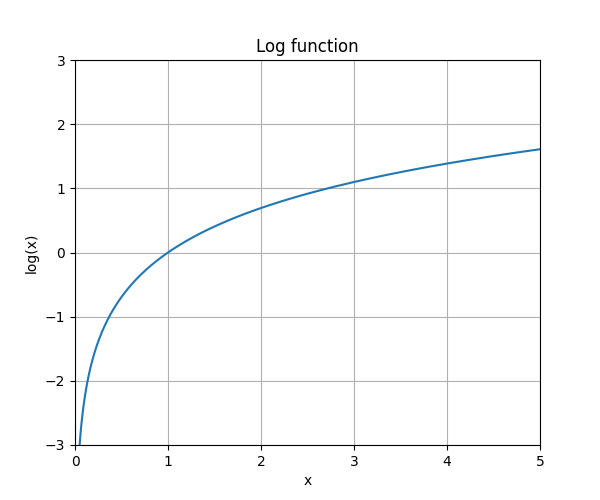

In [3]:
# Plotting log function
plt.figure(figsize=(6,5))
x = np.linspace(0.01,10,1000)
y = np.log(x)
plt.plot(x,y)
plt.grid(True)
plt.xticks([0,1,2,3,4,5])
plt.yticks([-3,-2,-1,0,1,2,3])
plt.axis([0,5,-3,3])
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("Log function")

Unlike linear regression, logistic regression cost function does not have any closed form solution (i.e no equivalent of normal equation)  
but it still have _convex_ shape, that means gradient descent will find global minimum of cost function if a) The learning rate is optimum b) You have enough time to run algorithm


Partial derivative of cost function for each feature $\theta$
$$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\theta^T x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$